<a href="https://colab.research.google.com/github/koteshvarma2/MLT/blob/main/Task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

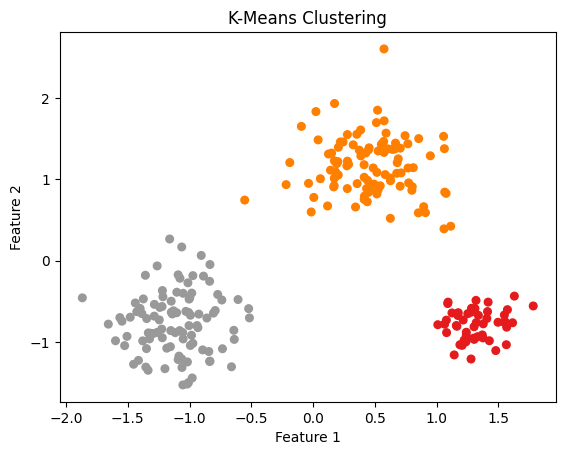

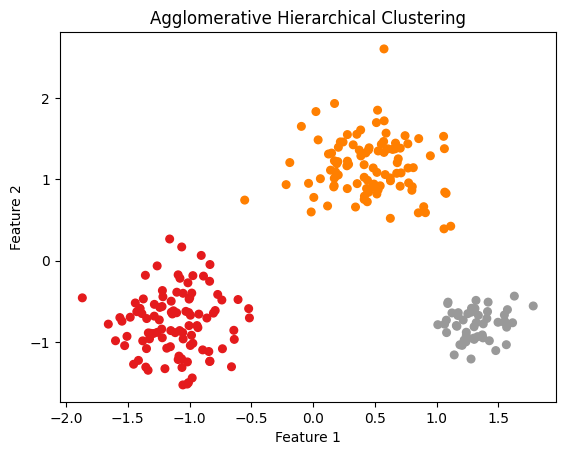

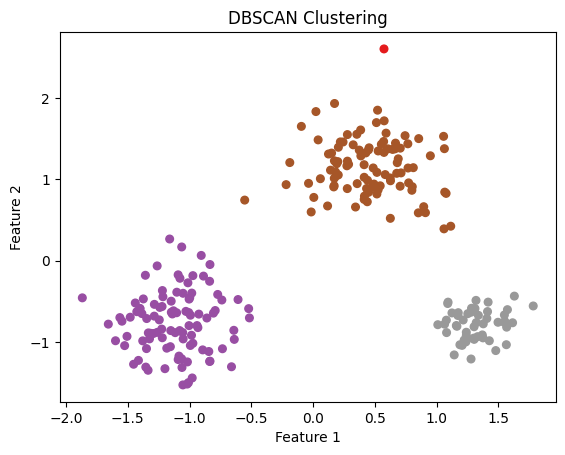

K-Means: Number of clusters = 3, Noise points = 0
Agglomerative: Number of clusters = 3, Noise points = 0
DBSCAN: Number of clusters = 3, Noise points = 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=[0, 0], scale=1.0, size=(100, 2)),
    np.random.normal(loc=[5, 5], scale=1.0, size=(100, 2)),
    np.random.normal(loc=[8, 0], scale=0.5, size=(50, 2))
])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(data_scaled)

agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(data_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(data_scaled)

def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='Set1', s=30)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_clusters(data_scaled, labels_kmeans, 'K-Means Clustering')
plot_clusters(data_scaled, labels_agglo, 'Agglomerative Hierarchical Clustering')
plot_clusters(data_scaled, labels_dbscan, 'DBSCAN Clustering')

def report_clusters(labels, algo_name):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1) if -1 in labels else 0
    print(f'{algo_name}: Number of clusters = {n_clusters}, Noise points = {n_noise}')

report_clusters(labels_kmeans, 'K-Means')

report_clusters(labels_agglo, 'Agglomerative')

report_clusters(labels_dbscan, 'DBSCAN')
